# <center>Project: NO CALL, NO SHOW!

![FRIENDSUrl](https://media.giphy.com/media/UTY42CoHu6wixtxTDh/giphy.gif "ross")

# <font color=navy> INTRODUCTION

Our project analyzes absenteeism in the workforce. We are exploring numerous variables which describe the characteristics of the employees in our dataset, how was the weather and what day of the week was it when an employee called-out or took a leave of absence. We are incorporating our assumptions and using various statistical calculations and machine learning algorithms to test whether they are right or not. We will discover relationships between the variables, which variables are more important than others, and how we can predict future outcome by utilizing past information. For instance, we are assuming that people living far from their workplace are more likely to call-out from the work than the people living near to their workplace.

The dataset contains 740 records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. There are 21 variables in the dataset. The variables describe personal detail of the employees such as their age, medical conditions, education status, BMI as well as in which season and what day of the week was it when an employee called-out. We acquired the dataset from University of California Irvine (UCI) Machine Learning Repository. The data is available as a csv file uploaded by PhD students (Andrea Martiniano, Ricardo Pinto Ferreira, and Renato Jose Sassi) from Nove de Julho University.

After conducting our analysis, we would be able to see what factor affects the number of absenteeism the most. These descriptive, predictive, and prescriptive analyses are very relevant to each one of us as we are or will be part of the labor force one day. They will give us a profound overview of the employment environment. Moreover, the companies can use our exploratory and predictive analysis to better prepare for their businesses and employees need.

In [1]:
#importing all required modules
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', 500)

# Read data from file 'filename.csv' 
# Control delimiters, rows, column names with read_csv
absent = pd.read_csv("Absenteeism_at_work.csv", delimiter=';')
data = absent.copy()

# <font color=navy> DATA CLEANING

Since most of our data was clean by the collectors, we did not have to clean, enhance, and transform the data a lot. We changed the data types of the columns. We found a duplicate entry in our column so we removed it by indexing. We also changed the names of the column to make more sense out of them. We changed cell values for seasons, days of the week, and reasons for absence from the dictionary provided by the collectors. We also dropped the Hit Target column since it was not providing any value to our analysis. Our clean data is presented in the end.

In [6]:
# Check the data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [7]:
#changing to appropiate type
data['Social drinker'] = data['Social drinker'].astype('bool')
data['Social smoker'] = data['Social smoker'].astype('bool')
data['Disciplinary failure'] = data['Disciplinary failure'].astype('bool')
data['Seasons'] = data['Seasons'].astype('category')
data['Education'] = data['Education'].astype('int')
data['Day of the week'] = data['Day of the week'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Reason for absence'] = data['Reason for absence'].astype('category')

In [8]:
# Recheck the data types of columns to ensure that they are updated
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null category
Month of absence                   740 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null bool
Education                          740 non-null int32
Son                                740 non-null int64
Social drinker                     740 non-null bool
Social smoker                      740 non-null bool
Pet                 

In [9]:
# Remove abnormal duplicate
# We found this duplicate while creating a table of Absenteeism time in hours by ID and Age
data.loc[(data['ID'] == '29') & (data['Age'] == 28)].index #find the row index of the duplicated data

Int64Index([], dtype='int64')

In [10]:
# Drop the row
data = data.drop(51)

In [11]:
# Change the name of the cell values to make more sense out of them
data['Day of the week'].replace([2,3,4,5,6], ['Monday', 'Tuesday','Wednesday','Thursday','Friday'], inplace=True)
data['Seasons'].replace([1,2,3,4], ['Summer', 'Autumn','Winter','Spring'], inplace=True)
data['Reason for absence'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],['Unknown','Certain infectious and parasitic diseases',
'Neoplasms',
'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
'Endocrine, nutritional and metabolic diseases',
'Mental and behavioural disorders',
'Diseases of the nervous system',
'Diseases of the eye and adnexa',
'Diseases of the ear and mastoid process',
'Diseases of the circulatory system',
'Diseases of the respiratory system',
'Diseases of the digestive system',
'Diseases of the skin and subcutaneous tissue',
'Diseases of the musculoskeletal system and connective tissue',
'Diseases of the genitourinary system',
'Pregnancy, childbirth and the puerperium',
'Certain conditions originating in the perinatal period',
'Congenital malformations, deformations and chromosomal abnormalities',
'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
'Injury, poisoning and certain other consequences of external causes',
'External causes of morbidity and mortality',
'Factors influencing health status and contact with health services.',
'Patient follow-up', 
'Medical consultation',
'Blood donation', 'Laboratory examination', 'Unjustified absence', 'Physiotherapy', 'Dental consultation'                                                                                                           
],inplace = True)

In [12]:
#Change the name of the columns to make more sense out of them
data.rename(columns= {'ID' : 'Employee ID', 'Seasons' : 'Season of absence', 'Service time' : 'Service time (in years)', 'Work load Average/day ': 'Average workload per day', 'Education': 'Education level', 'Son':'Number of Sons', 'Pet': 'Number of Pets', 'Absenteeism time in hours': 'Hours of absenteeism'}, inplace = True)

In [13]:
# Drop the column 'Hit target' because it was not very useful
data = data.drop(columns = ['Hit target'])
data.head()

,Employee ID,Reason for absence,Month of absence,Day of the week,Season of absence,Transportation expense,Distance from Residence to Work,Service time (in years),Age,Average workload per day,Disciplinary failure,Education level,Number of Sons,Social drinker,Social smoker,Number of Pets,Weight,Height,Body mass index,Hours of absenteeism
0,11,Unjustified absence,7,Tuesday,Summer,289,36,13,33,239.554,False,1,2,True,False,1,90,172,30,4
1,36,Unknown,7,Tuesday,Summer,118,13,18,50,239.554,True,1,1,True,False,0,98,178,31,0
2,3,Medical consultation,7,Wednesday,Summer,179,51,18,38,239.554,False,1,0,True,False,0,89,170,31,2
3,7,Diseases of the eye and adnexa,7,Thursday,Summer,279,5,14,39,239.554,False,1,2,True,True,0,68,168,24,4
4,11,Medical consultation,7,Thursday,Summer,289,36,13,33,239.554,False,1,2,True,False,1,90,172,30,2


# <font color=Navy> DATA ANALYSIS

# <center>EXPLORATORY ANALYSIS

![EXPLOUrl](https://media.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif "expo")

## <center>Analysis #1

### Reasons why employees are absent and their significance

In [14]:
#trimming down x-axis values
data1 = data.copy()
data1['Reason for absence'].replace(['Unknown','Certain infectious and parasitic diseases',
'Neoplasms',
'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
'Endocrine, nutritional and metabolic diseases',
'Mental and behavioural disorders',
'Diseases of the nervous system',
'Diseases of the eye and adnexa',
'Diseases of the ear and mastoid process',
'Diseases of the circulatory system',
'Diseases of the respiratory system',
'Diseases of the digestive system',
'Diseases of the skin and subcutaneous tissue',
'Diseases of the musculoskeletal system and connective tissue',
'Diseases of the genitourinary system',
'Pregnancy, childbirth and the puerperium',
'Certain conditions originating in the perinatal period',
'Congenital malformations, deformations and chromosomal abnormalities',
'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
'Injury, poisoning and certain other consequences of external causes',
'External causes of morbidity and mortality',
'Factors influencing health status and contact with health services.',
'Patient follow-up', 
'Medical consultation',
'Blood donation', 'Laboratory examination', 'Unjustified absence', 'Physiotherapy', 'Dental consultation'                                                                                                           
],['Unknown','Infections/parasitic diseases','Neoplasms','Blood related disorders','Nutritional/metabolic','Mental disorders',
   'Nervous system disorder','Eye/adnexa diseases','Ear/mastoid diseases','Circulatory disorder',
   'Respiratory disorder','Digestive disorder','Skin/tissue disorders',
   'Connective tissue disorders','Genitourinary disorders','Pregnancy',
   'Perinatal period','Congenital abnormalities','Symtoms/laboratory findings',
   'Injury','Morbidity/mortality','Contact with health services','Patient follow-up', 
   'Medical consultation','Blood donation', 'Laboratory examination', 'Unjustified absence',
   'Physiotherapy', 'Dental consultation']
   ,inplace = True)

In [15]:
#common reasons of absence
data1.groupby(['Reason for absence'])[['Employee ID']].count().sort_values(by='Employee ID', ascending=False)

,Employee ID
Reason for absence,
Medical consultation,149
Dental consultation,112
Physiotherapy,69
Connective tissue disorders,55
Unknown,42
Injury,40
Patient follow-up,38
Unjustified absence,33
Laboratory examination,31


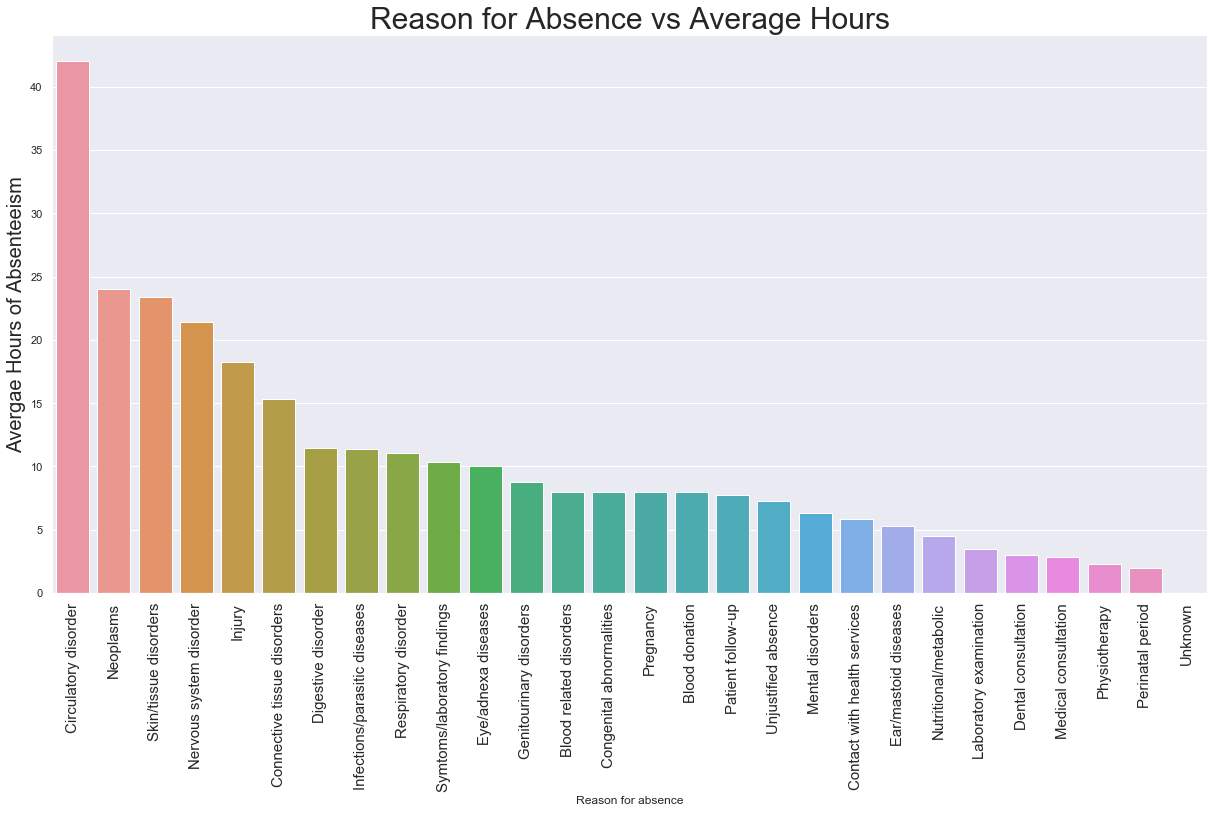

In [17]:
#plotting the findinds
dis = data1.groupby(['Reason for absence'])[['Hours of absenteeism']].mean().sort_values(by='Hours of absenteeism', ascending=False)
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.barplot(x=dis.index, y=dis['Hours of absenteeism']);
plt.ylabel('Avergae Hours of Absenteeism',fontsize=20)
plt.title('Reason for Absence vs Average Hours',fontsize=30)
plt.xticks(rotation='vertical',fontsize=15);

Here we conducted an analysis to find out what are the reasons for which employees remain absent. We plotted a bar graph comparing the average hours of absence vs the reasons recorded. Different reasons have varying average absence. The highest mean hours of absence are for reason: __'Circulatory disorders'__. __'Perinatal period'__ was recorded the for the least in terms of hours of absence. However, in the grouped dataframe above, we can see how many employees have same Reason for absence. __Medical__ and  __Dental Consultations__ rank the highest amongst employees.

The findings were what we expected. More numbers of employees have common or regular reasons for absence, whereas, in terms of hours, employees with severe medical condition take longer periods of absence.

## <center>Analysis #2

### Average hours of absence vs. the distance

Text(0.5, 1.0, 'Average Hours of Absence vs Distance')

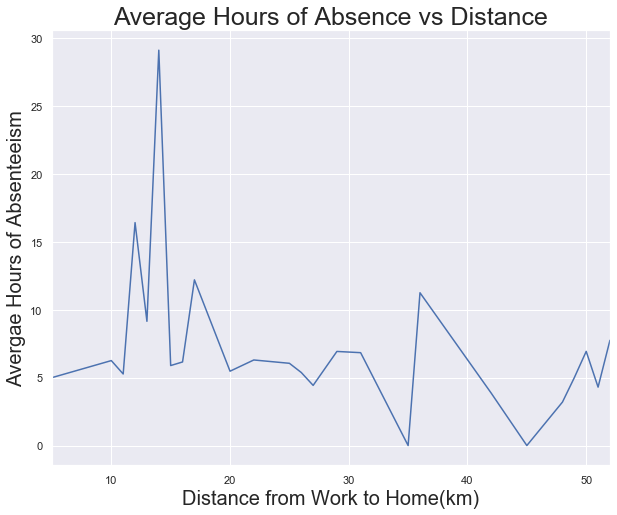

In [18]:
#distribution of two interactions
dis_abs = data.groupby(['Distance from Residence to Work'])[['Hours of absenteeism']].mean()
ax = dis_abs.plot(kind ='line',figsize =(10,8),legend = False)
ax.set_xlabel('Distance from Work to Home(km)',fontsize=20)
ax.set_ylabel('Avergae Hours of Absenteeism',fontsize=20)
ax.set_title('Average Hours of Absence vs Distance',fontsize=25)

As we can see from the line plot above, the people who have taken more hours of absense live closer to work. This is a surprising result, since we would expect more people living farther away from work to take more hours of absense. We believe that people living closer to work, tend to leave early or leave during lunch breaks so they end up taking more hours of absence. 

## <center>Analysis #3

### How do numerical variables affect the number of absenteeism?

In [19]:
# Create a data frame with all numeric columns that need to be investigated
df1 = pd.DataFrame(data.select_dtypes('number'))

In [20]:
# Define labels for independent variables and dependent variable
x_label = df1.columns[1:12]
y_label = df1.columns[-1]

In [21]:
# Create an interatctive scatter plot to demonstrate correlations between numerical variables and hours of absenteeism
@interact
def scatter_plot(x = x_label, 
                 y = y_label):
    print(f" The correlation between x and y is: {df1[x].corr(df1[y])}")
    
    trace = go.Scatter(
        x = df1[x],
        y= df1[y],
        mode='markers',
        line = dict(width = 2, color = 'rgba(255, 0, 0, 0.8)')
        )
    
    layout = dict(title = f'{x.title()} vs. {y.title()}',
              xaxis = dict(title = x.title() ),
              yaxis = dict(title = df1.dtypes.index[-1]),
              hovermode = 'closest',
              )
    
    data = [trace]
    fig = dict(data=data, layout=layout)
    
    iplot(fig)

interactive(children=(Dropdown(description='x', options=('Transportation expense', 'Distance from Residence to…

__Above graph is dynamic and works in jupyter notebook ONLY__

From the interactive graph above, we can select numerical variables of interest from the 'x' drop-down menu to find their relationship with 'Hours of absenteeism'. The correlation coefficient and the scatter plot displayed below help us to investigate how each numerical variable affects hours of absenteeism. Our findings are shown as follows:

<b>1. Transportation expense vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is positive and low, which is about 0.03. The data in the scatter plot is dispersed, showing a weak association between transportation expenses and hours of absenteeism. These findings correspond to our expectation that transportation expense is not strongly correlated with hours of absenteeism compared to other variables.

<b>2. Distance from residence to work vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is negative and low, which is about -0.09. The scatter plot shows a weak and negative association between distance from residence to work and hours of absenteeism. These findings contradict our expectation that commuting distance should at least have a positive relationship with hours of absenteeism. As the distance from residence to work and transportation expense should have a positive correlation, both variables are not independent. Therefore, we should only include one of the two in our analysis. 

<b>3. Service time (in years) vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is positive and low, which is about 0.02. The scatter plot shows a weak and positive association between service time and hours of absenteeism with some outliers at the end. These findings correspond to our expectation that service time has little correlation with hours of absenteeism.

<b>4. Age vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is positive and low, which is about 0.06. The data in the scatter plot is dispersed, showing a weak association between age and hours of absenteeism. These findings contradict our expectation that age should be strongly correlated with hours of absenteeism. Our initial expectation is based on the belief that older employees tend to have more health problems than the young.

<b>5. Average workload per day vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is positive and low, which is about 0.02. The data in the scatter plot is dispersed, showing a weak association between the average workload per day and hours of absenteeism. These findings contradict our expectation that the average workload per day should be strongly correlated with hours of absenteeism. Our initial expectation is based on the belief that a heavy workload will discourage employees from work.

<b>6. Education level vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is negative and low, which is about -0.05. The scatter plot shows a weak and negative association between education level and hours of absenteeism. These findings contradict our expectation that education level should at least have a positive relationship with hours of absenteeism. Our initial expectation is based on the assumption that employees with higher education tend to have higher morale for work.

<b>7. Number of sons vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is positive and low, which is about 0.11 (the second highest compared to those of other variables but still low statistically). The data in the scatter plot shows a weak association between the number of sons and hours of absenteeism. These findings contradict our expectation that the number of sons should be strongly correlated with hours of absenteeism. Our initial expectation is based on the belief that employees with more kids are more likely to be forced to miss work to take care of kids when normal arrangements have fallen through (e.g. a snow day at school) or if a child is sick.

<b>8. Number of pets vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is negative and low, which is about -0.03. The scatter plot shows a weak and negative association between the number of pets and hours of absenteeism. The weak correlation corresponds to our expectation that the number of pets has little correlation with hours of absenteeism. But we don't expect a negative correlation.

<b>9. Weight vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is positive and low, which is about 0.02. The data in the scatter plot is dispersed, showing a weak association between weight and hours of absenteeism. These findings correspond to our expectation that weight has little correlation with hours of absenteeism as we cannot tell whether an employee has obesity from weight itself.

<b>10. Height vs. Hours of Absenteeism</b><br>
The correlation coefficient of these two variables is positive and low, which is about 0.14 (the highest compared to those of other variables but still low statistically). The data in the scatter plot shows a weak association between height and hours of absenteeism. These findings correspond to our expectation that height has little correlation with hours of absenteeism.

<b>11. Body mass index (BMI) vs. Hours of Absenteeism</b><br>
<blockquote><i>The BMI is defined as the body weight divided by the square of the body height, and is universally expressed in units of kg/m².</i></blockquote>
The correlation coefficient of these two variables is negative and low, which is about -0.05. The data in the scatter plot is dispersed, showing a weak association between body mass index and hours of absenteeism. These findings correspond to our expectation that BMI has little correlation with hours of absenteeism. Our initial expectation is based on the understanding that 'BMI can be used to screen for weight categories that may lead to health problems but it is not diagnostic of the body fatness or health of an individual'. 

<b>Conclusion:</b><br>
This analysis gives us more insights into how each numerical variable affects hours of absenteeism. Some of the results correspond to our expectation while others are not. We believe these discrepancies may result from the limitation of our analysis. Our analysis can only examine the correlation between one variable with hours of absenteeism, so we neglect the joint effect of these variables on hours of absenteeism.

Reference:
https://www.cdc.gov/healthyweight/assessing/bmi/index.html

# <center>PREDICTIVE ANALYSIS

![PredictUrl](https://media.giphy.com/media/S44XJSyG0b8QJzNcpx/giphy.gif "predict")

We believe courier service companies relies heavily on employees. A little shortage in workforce, even for a day, could create bottleneck in the routine operations of the business. Therefore, it is vital that companies plan ahead and predict the number of hours an employee is expected to take leave of absence. Companies could adopt various machine learning algorithm and utilize past data and employees’ characteristics to devise a plan for employee health coverage, awareness and support, retention, and extra buffer for operations.

In this section of the project we adopt __3 Machine Learning__ algorithm to classify employees and predict the future number of hours of absenteeism. We begin our analysis by first analyzing the output variable: __Hours of Absenteeism__

Text(0.5, 1.0, 'Hours of Absenteeism Distribution')

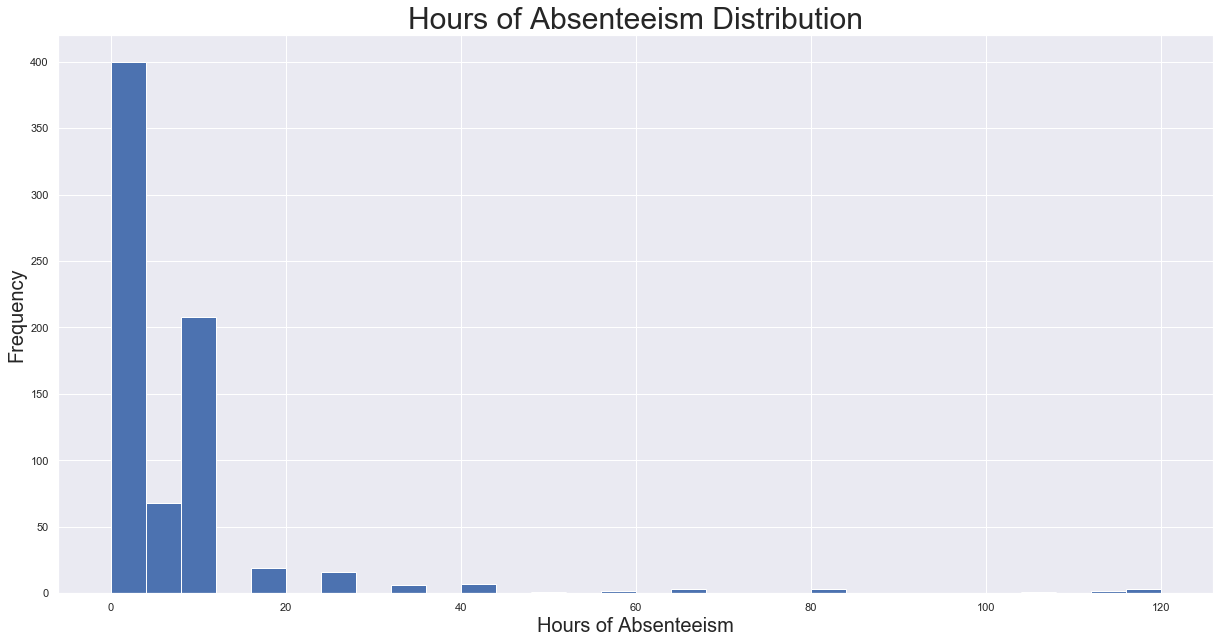

In [22]:
df=data
#Histogram of dependent variable
df.hist(column='Hours of absenteeism', bins=30)
plt.xlabel('Hours of Absenteeism',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Hours of Absenteeism Distribution',fontsize=30)

Text(0, 0.5, 'Hours of absenteeism')

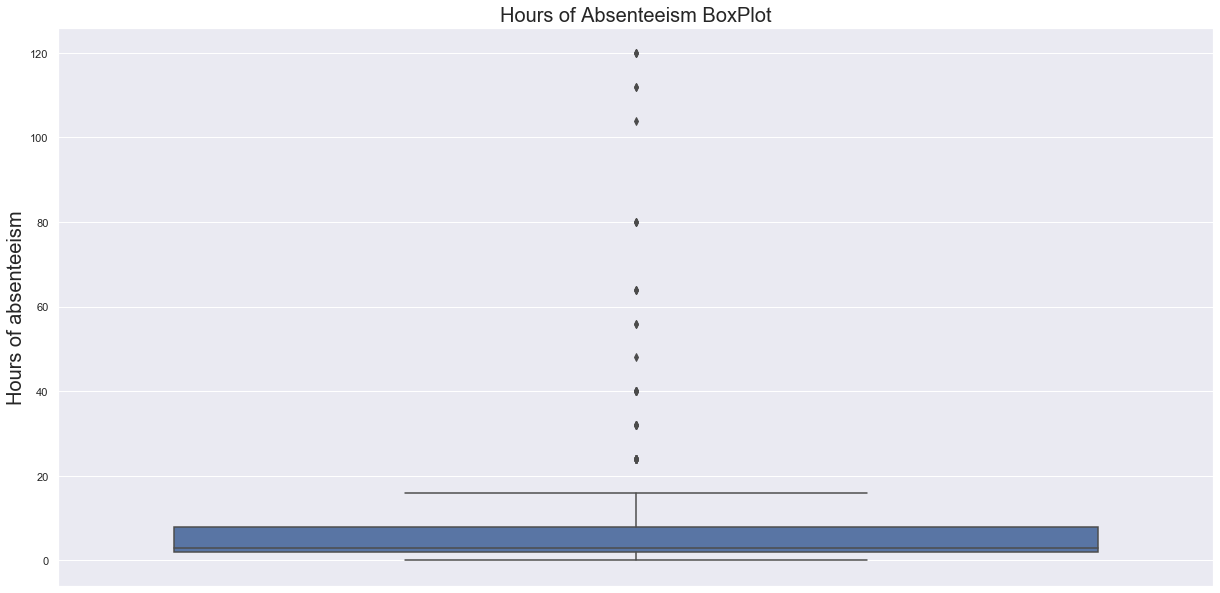

In [23]:
#Box and Whisker Plot of dependent variable
sns.boxplot(y='Hours of absenteeism', data=df)
plt.title('Hours of Absenteeism BoxPlot',fontsize=20)
plt.ylabel('Hours of absenteeism',fontsize=20)

In [24]:
#statistics of dependent variable
df['Hours of absenteeism'].describe()

count    739.000000
mean       6.933694
std       13.337588
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Hours of absenteeism, dtype: float64

After looking at “Hours of Absenteeism” variable distribution and statistics above, we conclude that a cutoff of __8 numbers of hours__ is appropriate in predictions for business. By looking at the histogram, most of the data is split between __below 8__ and __above 8__. Same thing could be proven by box and whisker plot where 75th quartile is at number 8. We conclude that employees taking 8 hours or less of absence is normal for the business; whereas for employees taking more than 8 hours, company should take proactive and precautious measures. A cutoff of hours is more appropriate for business needs than predicting the actual numbers of absence hours.

In [25]:
#making prediction binary to satisfy business needs
df['absent'] = np.where(df['Hours of absenteeism'] > 8, '1', '0')

## Supervised Learning

In [26]:
#identifying all categorical variables
cat_var = ['Reason for absence','Month of absence', 'Day of the week','Season of absence','Disciplinary failure','Education level','Number of Sons','Number of Pets','Social drinker','Social smoker']

In [27]:
#converting categories into dummies
final_df = pd.get_dummies(df,columns=cat_var,drop_first=True)

In [28]:
#dropping unneeded columns in algorithm
final_df = final_df.drop(['Employee ID'], axis=1)
final_df = final_df.drop(['Hours of absenteeism'], axis=1)

## <center>Analysis #4

### K-Nearest Neighbour-   Predict High/Low Hours of Absence

In [29]:
# splitting the data
X = final_df.drop('absent',axis=1)
y = final_df['absent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (591, 69) (591,)
Test set: (148, 69) (148,)


In [30]:
# normalizing the data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [31]:
#picking number of Ks in model
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
#predicting on Test set
yhat = neigh.predict(X_test)

In [33]:
# getting accuracy matrix
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9323181049069373
Test set Accuracy:  0.8918918918918919


In [34]:
#creating loop to find optimal K
Ks = 7
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.85135135, 0.89864865, 0.89189189, 0.90540541, 0.90540541,
       0.90540541])

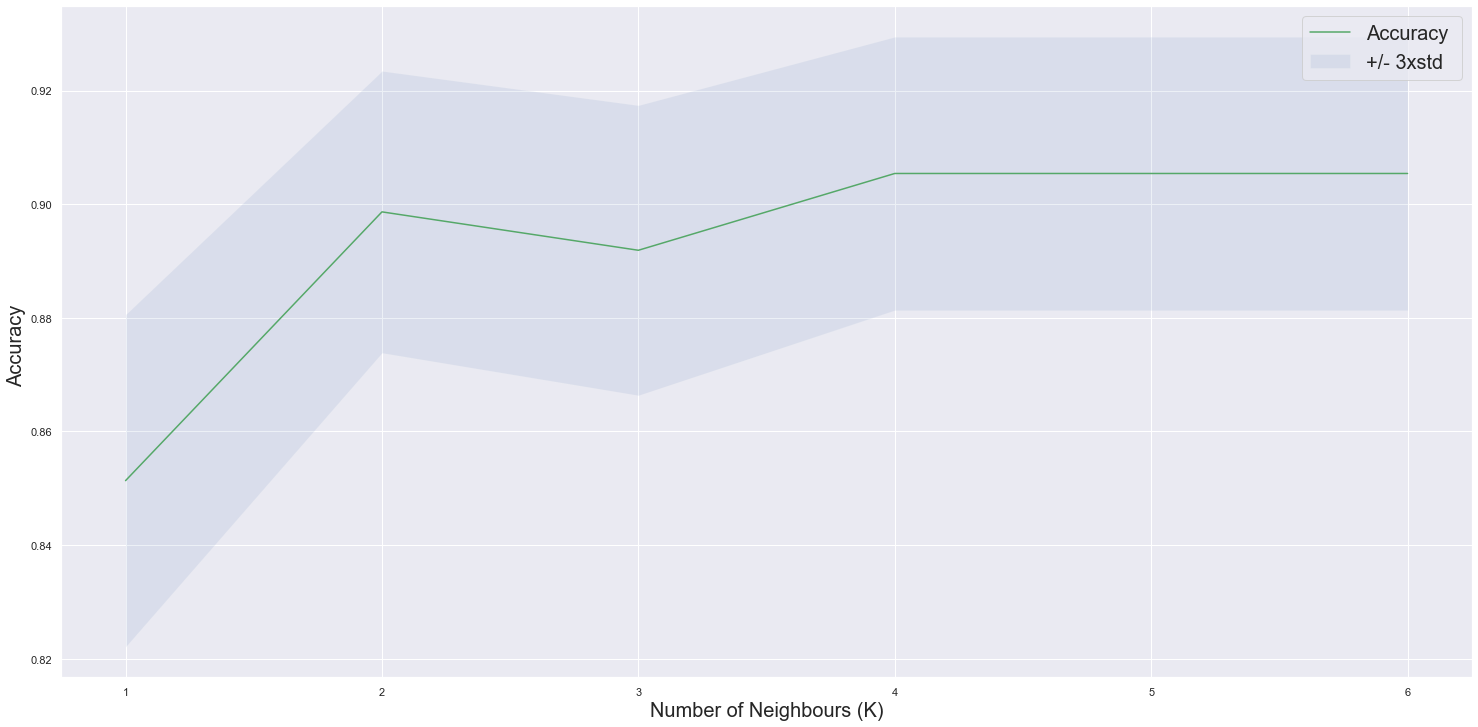

In [35]:
#plotting loop results
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'),fontsize=20)
plt.ylabel('Accuracy ',fontsize=20)
plt.xlabel('Number of Neighbours (K)',fontsize=20)
plt.tight_layout()
plt.show()

In [36]:
# optimal results
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9054054054054054 with k= 4


The KNN perform well in predicting the outcome variable. The model accuracy is up to __90.54%__. We started with 3 Ks. Then we created a loop to find the K with highest accuracy. The result shows that 4 Ks are most appropriate after which the accuracy is stagnant. We approve that the company can deploy this model to predict absenteeism hours of its employees.

## <center>Analysis #5

### RandomForest-   Which variables impact Hours of Absence Most

In [37]:
# splitting the data
X = final_df.drop('absent',axis=1)
y = final_df['absent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (591, 69) (591,)
Test set: (148, 69) (148,)


In [38]:
#training the model
rfc = RandomForestClassifier(n_estimators=300)

In [39]:
#fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
#predicting on test data
predictions = rfc.predict(X_test)

In [41]:
# getting accuracy
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictions))

Test set Accuracy:  0.8986486486486487


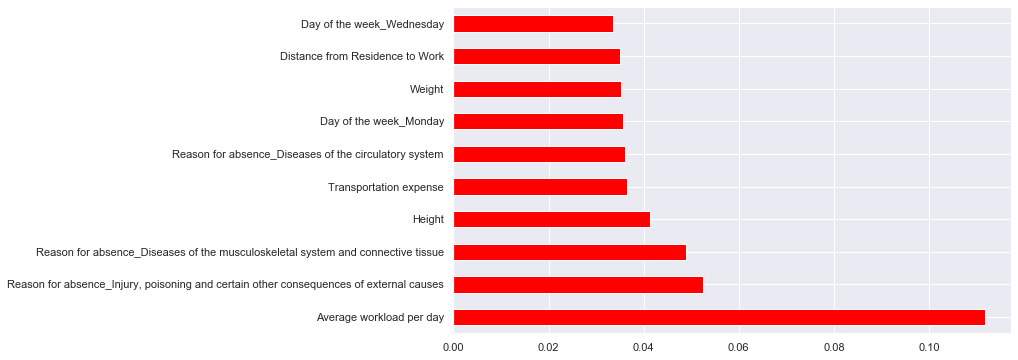

In [42]:
#which variables influence the hours of absenteesim the most
ax = (pd.Series(rfc.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh', figsize=(10,6), color='red'))
plt.show()

This model performs similar to our previous model in accuracy. However, in this our main motive was to identify the input (independent) variables which impacts the prediction most. Above graph shows ‘Top 10’ attributes. We observe that __Average workload/day__ impacts the absence the most. The more an employee workload per hour increases, the more an employee is likely to take absence. This meets our assumptions of intense physical labor in courier company can result in increase number of hours absence. This assumption is also proven by next variable: __Reason for Absence: Injury__. Injury are more likely to happen in warehouse work environment like courier service. Other variables include __Monday__ more people are likely to call out, higher in __Height__ and __Weight__ are likely to get absent and employee with higher __transportation expenses__ are likely to be absent.

## Unsupervised Learning

In this unsupervised learning our main motive is to segment the dataset and find hidden pattern between clusters of the dataset

## <center>Analysis #6

### K-means Clustering

In [2]:
#creating centroids of the dataset
X = absent.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [3]:
# Using K-means clustering to Cluster data into 3 sets
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [4]:
#grouping results
absent["Clus_km"] = labels
absent.groupby('Clus_km').mean()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,14.861635,17.723270,7.018868,3.849057,2.610063,318.547170,33.446541,10.584906,34.566038,274.944365,93.842767,0.088050,1.100629,1.371069,0.798742,0.100629,1.383648,79.792453,172.666667,26.628931,8.647799
1,17.674923,20.352941,5.650155,3.848297,2.473684,159.349845,29.544892,14.321981,37.263158,270.954189,94.990712,0.024768,1.346749,0.476780,0.575851,0.089783,0.077399,81.588235,173.891641,27.077399,6.619195
2,20.391473,18.713178,6.740310,4.038760,2.593023,239.011628,27.387597,11.554264,36.593023,270.032624,94.542636,0.069767,1.341085,1.480620,0.414729,0.034884,1.189922,75.372093,169.550388,26.205426,6.244186


### We can divide our data into 3 clusters

#### 1st cluster = Employees with least transportation expense, most service time, least number of sons
#### 2nd cluster = Employees with highest transportation expense, least service time, mid number of sons
#### 3rd cluster = Employees with mid transportation expense, mid service time, high number of sons

By observing different pattern, we can conclude that first cluster contains companies’ oldest employees and who live near to work, the second cluster have junior employees and who live far from work, and third cluster includes mid-level of other two clusters. Company could utilize this information to treat employees in different clusters separately and differently.

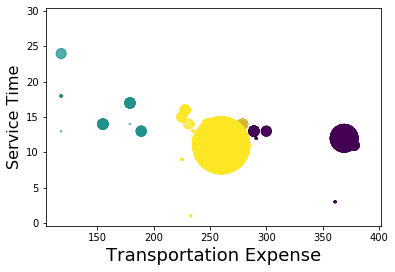

In [5]:
#visualizing results
area = np.pi * ( X[:, 12])**5  
plt.scatter(X[:, 4], X[:, 6], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Transportation Expense', fontsize=18)
plt.ylabel('Service Time', fontsize=16)

plt.show()

The image above shows the distribution of clusters. We can see clear distinctions. The size of the circle represents Number of Son employees has. As seen Yellow cluster employees has most number of Sons

# <font color=Navy> CONCLUSION

The greatest achievement we have attain from this project is to derive profound insights and learning from a very concise dataset. We were successful in testing various hypothesis using diverse set of tools and algorithms. Sometimes our findings were as predicted but most of the other time they were not what we expected at the beginning of our project. For instance, the correlation and interactions between some variables were not what we forecasted from our domain knowledge earlier. Moreover, machine learning allowed us not only to predict the future, but also demonstrate the influence of different variables on the output variable. This shows power of data analysis which can uncover the hidden pattern and trends in the datasets.

We all are content that we were able to do such extensive research and exploration, although none of us had any familiarity with Python when we started the course. We believe our exploratory and predictive research could be useful for many companies who need to improve their employees’ management and retention. These analyses could be used to create work-schedule plan, employee health and wellness awareness, and public policies to empower the labor force. On the other hand, the research gives us a general outlook of our future work environment.

![ProjectUrl](https://media.makeameme.org/created/finished-project-woohoo.jpg "Project")